## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Read dataset from csv file

In [2]:
my_data = pd.read_csv('property_data.csv')

In [3]:
my_frame = pd.DataFrame(my_data)
my_frame.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NaN,NaN


In [4]:
my_frame.shape

(191393, 24)

In [5]:
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    191393 non-null  int64  
 1   location_id    191393 non-null  int64  
 2   page_url       191393 non-null  object 
 3   property_type  191393 non-null  object 
 4   price          191393 non-null  int64  
 5   price_bin      191393 non-null  object 
 6   location       191393 non-null  object 
 7   city           191393 non-null  object 
 8   province_name  191393 non-null  object 
 9   locality       191393 non-null  object 
 10  latitude       191393 non-null  float64
 11  longitude      191393 non-null  float64
 12  baths          191393 non-null  int64  
 13  area           191393 non-null  object 
 14  area_marla     191393 non-null  float64
 15  area_sqft      191393 non-null  float64
 16  purpose        191393 non-null  object 
 17  bedrooms       191393 non-nul

In [6]:
my_frame.describe()

,property_id,location_id,price,latitude,longitude,baths,area_marla,area_sqft,bedrooms,year,month,day
count,1.913930e+05,191393.000000,1.913930e+05,191393.000000,191393.000000,191393.000000,191393.000000,1.913930e+05,191393.000000,191393.000000,191393.000000,191393.000000
mean,1.573170e+07,4224.580350,1.644655e+07,30.104593,71.572992,2.865956,14.573527,3.967656e+03,3.171516,2018.935687,6.212270,13.349631
std,2.215249e+06,3719.125201,3.416412e+07,3.645941,3.080463,2.435332,443.343252,1.207006e+05,1.952403,0.245310,1.815174,8.486820
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00,0.000000,2018.000000,1.000000,1.000000
25%,1.511867e+07,1057.000000,8.000000e+04,24.972287,67.152597,0.000000,4.900000,1.334030e+03,2.000000,2019.000000,6.000000,5.000000
50%,1.676385e+07,3233.000000,7.300000e+06,31.463563,73.077743,3.000000,7.600000,2.069110e+03,3.000000,2019.000000,7.000000,14.000000
75%,1.715282e+07,7182.000000,1.800000e+07,33.550869,74.228218,4.000000,12.000000,3.267010e+03,4.000000,2019.000000,7.000000,20.000000
max,1.769386e+07,14246.000000,2.000000e+09,73.184088,80.161430,403.000000,124444.000000,3.388000e+07,68.000000,2019.000000,12.000000,30.000000


In [7]:
my_frame.dtypes

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
price_bin         object
location          object
city              object
province_name     object
locality          object
latitude         float64
longitude        float64
baths              int64
area              object
area_marla       float64
area_sqft        float64
purpose           object
bedrooms           int64
date_added        object
year               int64
month              int64
day                int64
agency            object
agent             object
dtype: object

In [8]:
my_frame.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
price_bin            0
location             0
city                 0
province_name        0
locality             0
latitude             0
longitude            0
baths                0
area                 0
area_marla           0
area_sqft            0
purpose              0
bedrooms             0
date_added           0
year                 0
month                0
day                  0
agency           47379
agent            47380
dtype: int64

In [9]:
my_frame.columns.unique()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

In [10]:
my_frame.nunique()

property_id      191393
location_id        4321
page_url         191393
property_type         7
price              2116
price_bin             4
location           1536
city                  5
province_name         3
locality           1619
latitude           8091
longitude          8594
baths                17
area                352
area_marla          351
area_sqft           351
purpose               2
bedrooms             24
date_added          148
year                  2
month                12
day                  30
agency             5923
agent             11352
dtype: int64

## Data Cleaning / Data Wrangling

<AxesSubplot:>

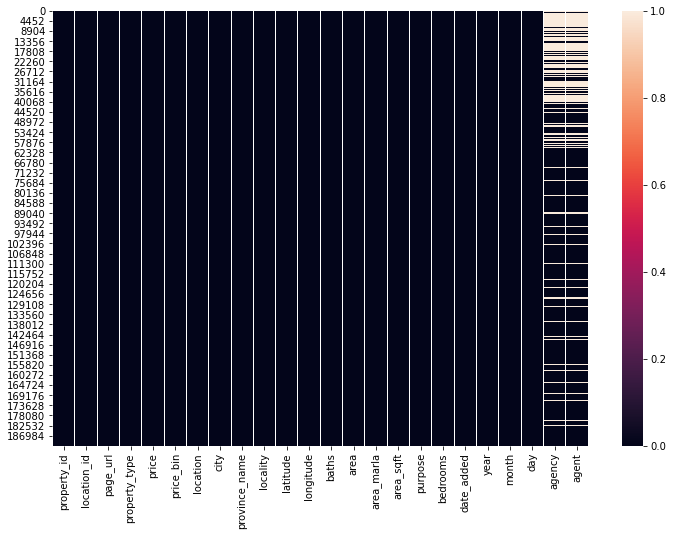

In [11]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.isnull())

In [12]:
my_frame.count()

property_id      191393
location_id      191393
page_url         191393
property_type    191393
price            191393
price_bin        191393
location         191393
city             191393
province_name    191393
locality         191393
latitude         191393
longitude        191393
baths            191393
area             191393
area_marla       191393
area_sqft        191393
purpose          191393
bedrooms         191393
date_added       191393
year             191393
month            191393
day              191393
agency           144014
agent            144013
dtype: int64

In [13]:
my_frame.corr()

,property_id,location_id,price,latitude,longitude,baths,area_marla,area_sqft,bedrooms,year,month,day
property_id,1.000000,-0.011014,-0.039687,0.023294,0.043368,-0.100241,0.003975,0.003975,-0.065099,0.378536,0.014441,0.143159
location_id,-0.011014,1.000000,-0.081339,-0.293861,-0.291134,-0.123689,-0.005862,-0.005862,-0.138379,-0.014835,-0.002273,-0.009690
price,-0.039687,-0.081339,1.000000,-0.084885,-0.049790,0.219297,0.021809,0.021809,0.303069,0.016298,-0.018600,-0.046424
latitude,0.023294,-0.293861,-0.084885,1.000000,0.915495,0.047043,0.008298,0.008298,0.025288,0.041195,-0.016026,-0.082797
longitude,0.043368,-0.291134,-0.049790,0.915495,1.000000,0.090028,0.007487,0.007487,0.072582,0.049397,-0.007706,-0.048613
baths,-0.100241,-0.123689,0.219297,0.047043,0.090028,1.000000,0.004605,0.004605,0.669057,-0.032543,0.000438,-0.030912
area_marla,0.003975,-0.005862,0.021809,0.008298,0.007487,0.004605,1.000000,1.000000,0.007573,0.002665,0.001398,0.000461
area_sqft,0.003975,-0.005862,0.021809,0.008298,0.007487,0.004605,1.000000,1.000000,0.007573,0.002665,0.001398,0.000461
bedrooms,-0.065099,-0.138379,0.303069,0.025288,0.072582,0.669057,0.007573,0.007573,1.000000,-0.019122,0.018371,-0.029751
year,0.378536,-0.014835,0.016298,0.041195,0.049397,-0.032543,0.002665,0.002665,-0.019122,1.000000,-0.566950,0.005882


<AxesSubplot:>

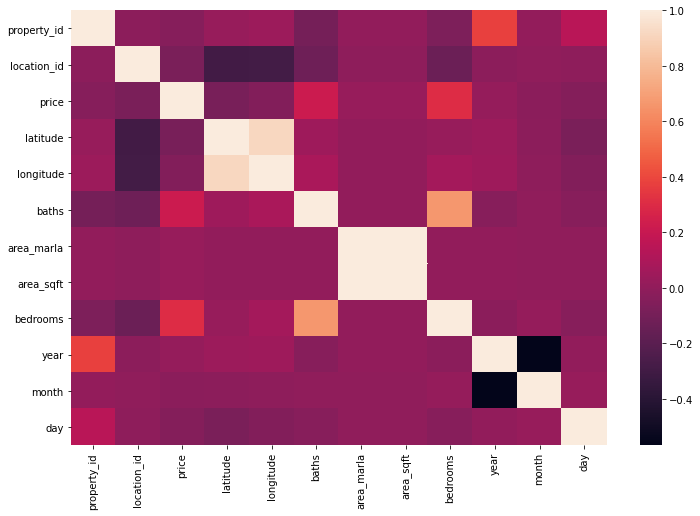

In [14]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.corr(), xticklabels = my_frame.corr().columns.values, yticklabels = my_frame.corr().columns.values)

<AxesSubplot:>

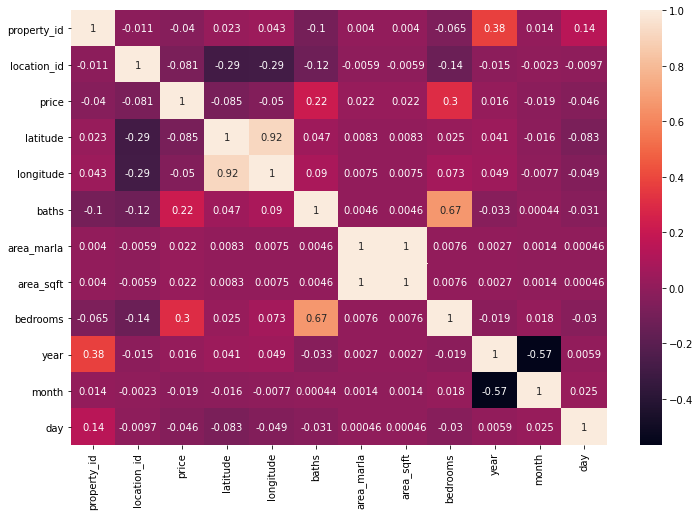

In [15]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.corr(), xticklabels = my_frame.corr().columns.values, yticklabels = my_frame.corr().columns.values, annot = True)

In [16]:
my_frame.columns.unique()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

## Exploratory Data Analysis (EDA)

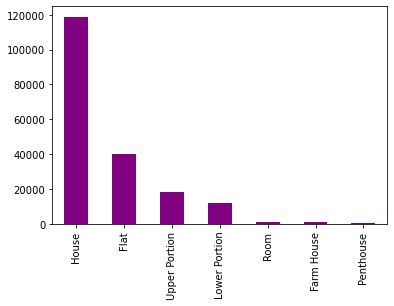

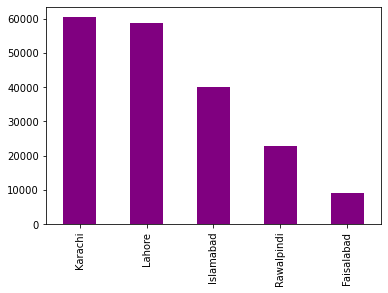

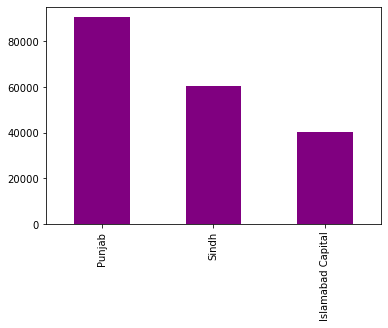

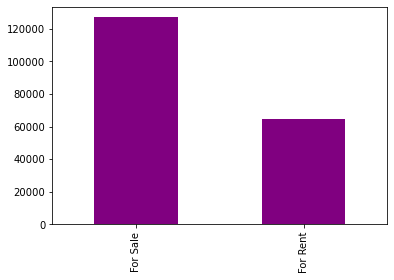

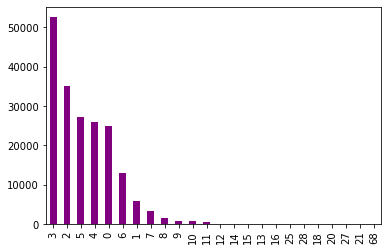

In [17]:
# visualise the count of each category in categorical columns

categorical_features = ['property_type', 'city', 'province_name', 'purpose', 'bedrooms']

for i, cat_feature in enumerate(my_frame[categorical_features]):
    my_frame[cat_feature].value_counts().plot(kind = 'bar', color = 'purple')
    plt.show()

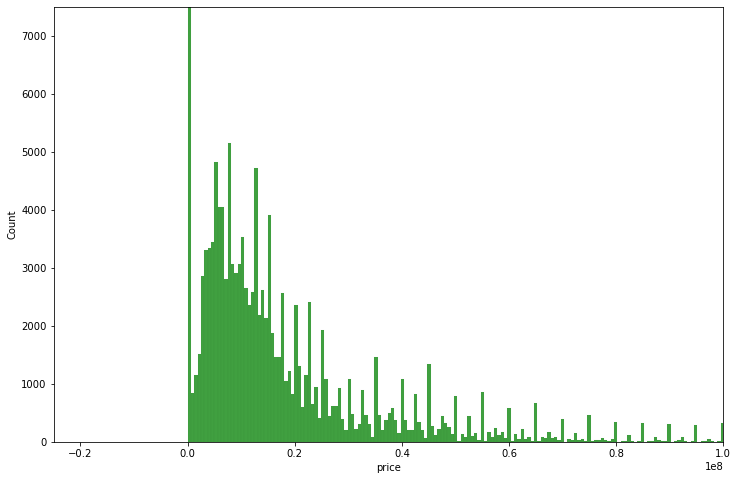

In [18]:
# seeing distribution of price in the dataset

fig, ax = plt.subplots(figsize = (12, 8))
sns.histplot(my_frame['price'], color = 'green')
plt.ylim(0, 7500)
plt.xlim(-25000000, 100000000)
plt.show()

<AxesSubplot:>

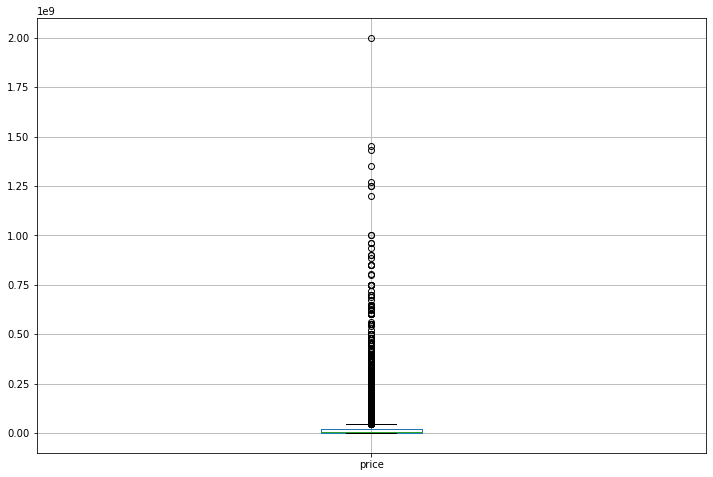

In [19]:
# visualizing price column with a box plot

fig = plt.figure(figsize = (12, 8))
my_frame.boxplot(column = 'price')

<AxesSubplot:xlabel='price', ylabel='property_type'>

<Figure size 864x576 with 0 Axes>

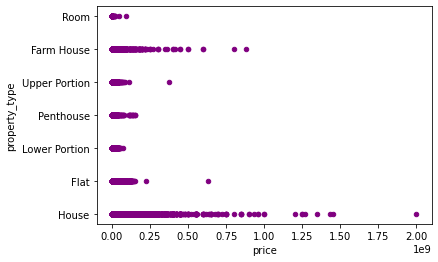

In [20]:
# visualizing price vs property type

fig = plt.figure(figsize = (12, 8))
my_frame.plot.scatter(x = 'price', y = 'property_type', color = 'purple')

In [21]:
my_frame = my_frame.fillna('NA')

In [22]:
my_frame.head()

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Low,Eden,Lahore,Punjab,"Eden, Lahore, Punjab",...,9.0,2450.26,For Sale,3,07-03-2019,2019,7,3,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Very High,Gulberg,Lahore,Punjab,"Gulberg, Lahore, Punjab",...,20.0,5445.02,For Sale,8,04-04-2019,2019,4,4,NA,NA
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,High,Allama Iqbal Town,Lahore,Punjab,"Allama Iqbal Town, Lahore, Punjab",...,11.0,2994.76,For Sale,6,04-04-2019,2019,4,4,NA,NA


<AxesSubplot:>

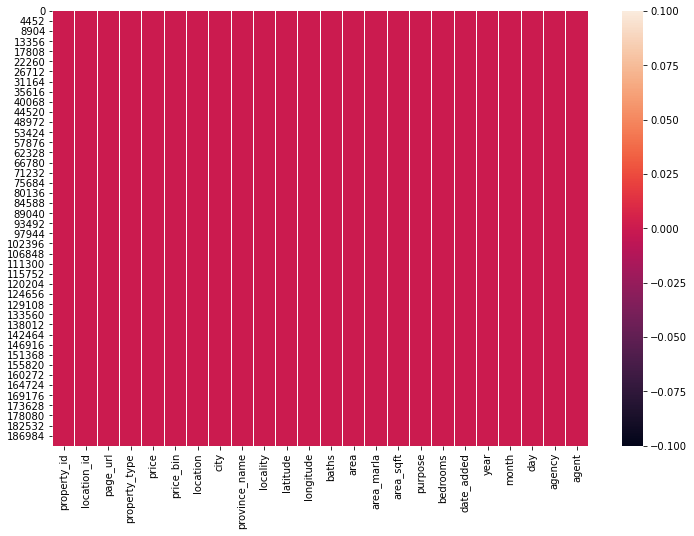

In [23]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.isnull())

In [24]:
my_frame.columns.unique()

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'price_bin', 'location', 'city', 'province_name', 'locality',
       'latitude', 'longitude', 'baths', 'area', 'area_marla', 'area_sqft',
       'purpose', 'bedrooms', 'date_added', 'year', 'month', 'day', 'agency',
       'agent'],
      dtype='object')

In [25]:
my_frame = my_frame.drop(
    ['property_id','location_id','page_url','location','latitude','longitude','area',
     'date_added','agency','agent', 'price_bin', 'locality'], axis = 1)

In [26]:
my_frame.head()

,property_type,price,city,province_name,baths,area_marla,area_sqft,purpose,bedrooms,year,month,day
0,House,220000000,Lahore,Punjab,0,120.0,32670.12,For Sale,0,2019,7,17
1,House,40000000,Lahore,Punjab,5,20.0,5445.02,For Sale,5,2018,10,6
2,House,9500000,Lahore,Punjab,0,9.0,2450.26,For Sale,3,2019,7,3
3,House,125000000,Lahore,Punjab,7,20.0,5445.02,For Sale,8,2019,4,4
4,House,21000000,Lahore,Punjab,5,11.0,2994.76,For Sale,6,2019,4,4


In [27]:
my_frame['property_type'] = my_frame['property_type'].astype('category').cat.codes
my_frame['city'] = my_frame['city'].astype('category').cat.codes
my_frame['province_name'] = my_frame['province_name'].astype('category').cat.codes
my_frame['purpose'] = my_frame['purpose'].astype('category').cat.codes

In [28]:
my_frame.head()

,property_type,price,city,province_name,baths,area_marla,area_sqft,purpose,bedrooms,year,month,day
0,2,220000000,3,1,0,120.0,32670.12,1,0,2019,7,17
1,2,40000000,3,1,5,20.0,5445.02,1,5,2018,10,6
2,2,9500000,3,1,0,9.0,2450.26,1,3,2019,7,3
3,2,125000000,3,1,7,20.0,5445.02,1,8,2019,4,4
4,2,21000000,3,1,5,11.0,2994.76,1,6,2019,4,4


In [48]:
x = my_frame[['property_type', 'city', 'province_name', 'baths', 'purpose', 'bedrooms', 'area_sqft']]
# x = my_frame.drop('price', axis = 1)
y = my_frame['price']

## train test split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 35)

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg_model = LinearRegression()

In [53]:
reg_model.fit(x_train, y_train)

LinearRegression()

In [54]:
lin_y_pred = reg_model.predict(x_test)

In [55]:
lr_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : lin_y_pred})
lr_data

,Actual,Predicted
85940,12000,-8.841816e+06
146628,8500000,2.468968e+07
158861,16000000,2.271921e+07
89319,8000000,2.347812e+07
65626,50000000,3.856136e+07
...,...,...
35493,400000,1.115214e+07
122624,22000000,2.386079e+07
108595,3600000,2.157729e+07
24674,39900000,2.001757e+07


## Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
forest_model = RandomForestRegressor()

In [58]:
forest_model.fit(x_train, y_train)

RandomForestRegressor()

In [59]:
forest_y_pred = forest_model.predict(x_test)

In [60]:
forest_data = pd.DataFrame({'Actual' : y_test, 'Predicted' : forest_y_pred})
forest_data

,Actual,Predicted
85940,12000,1.947594e+04
146628,8500000,1.434777e+07
158861,16000000,2.418547e+07
89319,8000000,9.385352e+06
65626,50000000,4.066530e+07
...,...,...
35493,400000,3.608952e+05
122624,22000000,1.359953e+07
108595,3600000,5.217807e+06
24674,39900000,3.590553e+07


## R2_Score, Mean_Squared_Error

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [62]:
print('Linear Regression Mean Square Error:', mean_squared_error(y_test, lin_y_pred))
print('Linear Regression R2 Score:', r2_score(y_test, lin_y_pred))

print('Random Forest Regressor Mean Square Error:', mean_squared_error(y_test, forest_y_pred))
print('Random Forest Regressor R2 Score:', r2_score(y_test, forest_y_pred))

Linear Regression Mean Square Error: 920098843481251.0
Linear Regression R2 Score: 0.19173592157733166
Random Forest Regressor Mean Square Error: 281463670911196.84
Random Forest Regressor R2 Score: 0.7527472442876346


## Apply Pickle

In [63]:
import pickle

In [64]:
pickle_out = open("regression_model.pkl", "wb")
pickle.dump(reg_model, pickle_out)
pickle_out.close()

In [65]:
pickle_out1 = open("forest_model.pkl", "wb")
pickle.dump(forest_model, pickle_out1)
pickle_out1.close()

In [66]:
x_train.head()

,property_type,city,province_name,baths,purpose,bedrooms,area_sqft
105207,1,1,0,3,1,3,2123.56
54031,2,1,0,4,1,4,1089.00
134782,2,1,0,0,0,0,7078.53
81802,2,1,0,3,1,3,1361.25
143745,1,2,2,2,1,2,1143.45


# THE END..!!